# Sonkhe Shongwe
## **Project Name:** Email spam detection with Machine Learning
### Task 4 at Oasis Infobyte as Data Science Intern



<img src="Spam.jpg" alt="Used Cars" width="70%" height="auto"/>

# Introduction

**Project Overview:**
In the era of information overload, email spam presents a relentless challenge, cluttering inboxes and obscuring essential communication. This project is the narrative of our quest to cut through this digital chaff. We harness the power of machine learning to craft an intelligent filter capable of discerning spam from legitimate emails, thereby safeguarding the sanctity of our digital correspondences.

<!-- Add two spaces at the end of this line -->

**Project Objectives:**

1. **Data Preprocessing:** Ensure pristine data quality through meticulous cleaning and preparation for analysis.
2. **Exploratory Data Analysis:** Unveil data insights and anomalies to guide our feature selection and modeling approach.
3. **Model Construction:** Experiment with a spectrum of machine learning models, refining them to peak performance.
4. **Model Evaluation:** Achieve data balance with SMOTE and critically evaluate models to select the optimal spam detector.


Through these objectives, our project endeavors to elevate the email experience by substantially diminishing the volume of spam. We're not only looking to streamline communication but also to provide a shield against the potential threats that spam emails often carry.


## Table of Contents

- [1. Importing Packages](#one)
- [2. Loading Data](#two)
- [3. Dataset Overview](#three)
- [4. Exploratory Data Analysis (EDA)](#five)
- [5. Text Preprocessing](#four)
- [6. Feature Selection](#six)
- [7. Model Training](#seven)
- [8. Model Evaluation](#eight)
- [9. Best Model - Selection](#nine)
- [10. Conclusion](#ten)


<a id="one"></a>
# 1. Importing Packages 📦
[Back to Table of Contents](#cont)

---

🌟 **Description: Importing Packages** 🌟

The foundation of our analysis begins with importing the following Python packages:

In [74]:
# Standard Libraries
import numpy as np
import pandas as pd

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline as ImbPipeline

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Libraries for Data Preprocessing and Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

# Natural Language Processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Constants
GLOBAL_CONSTANT = 42

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonkh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonkh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonkh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="two"></a>
# 2. Loading Data 💾
[Back to Table of Contents](#cont)

---

🌟 **Description: Loading Data** 🌟

In this section, we focus on loading our dataset into the Python environment using Pandas.

In [75]:
# Load the dataset
df_spam = pd.read_csv('spam.csv', encoding='latin-1')  # Using 'latin-1' encoding to handle special characters

<a id="three"></a>
# 3. Exploratory Data Analysis (EDA) 🔍
[Back to Table of Contents](#cont)

---

🌟 **Description: Exploratory Data Analysis (EDA)** 🌟

The purpose of Exploratory Data Analysis in our project is to gain an initial understanding of the dataset and uncover insights that will guide subsequent data processing and modeling. The key components of our EDA include:

- **Dataset Overview:** Quick inspection of the data to understand its nature and content.
- **Data Dimensionality:** Assessment of the dataset’s structure, including the number of features and observations.
- **Summary Statistics:** Calculation of essential statistical measures that describe the central tendency, dispersion, and

## 3.1 Dataset Overview

**The emails are divided into 2 Labels:**
- Spam: Unsolicited messages for advertising or deceptive purposes.
- Ham: Legitimate messages not considered spam.

In [76]:
def display_unique_label(df):
    unique_labels = df['v1'].unique()

    for label in unique_labels:
        example_email = df[df['v1'] == label]['v2'].iloc[0]
        print(f"\033[1mLabel: {label}\033[0m")
        print(f"\033[1mExample email:\033[0m {example_email}\n")

In [77]:
# Call the function with your DataFrame
display_unique_label(df_spam)

Label: ham
Example email: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Label: spam
Example email: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



In [78]:
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
# Drop the unnamed columns
df_spam = df_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [80]:
# Rename columns
df_spam.rename(columns={'v1': 'Label', 'v2': 'Email'}, inplace=True)

In [81]:
def reorder_label_to_end(df):
    # Get the index of the "Label" column
    label_index = df.columns.get_loc("Label")

    # Reorder the columns with "Label" at the end
    df_reordered = df[[col for col in df.columns if col != "Label"] + ["Label"]]

    return df_reordered

In [82]:
# Reorder dataframe
df_spam = reorder_label_to_end(df_spam)
df_spam.head()

,Email,Label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


## 3.2 Data Dimensionality
- Check the shape of `spam` data

In [83]:
df_spam.shape

(5572, 2)

- `Spam` data has **5572** rows and **2** columns

## 3.3 Information Summary
- Check the columns information for `spam` data

In [84]:
# check spam information summary
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Email   5572 non-null   object
 1   Label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Analysis of `df_spam` DataFrame:

**Categorical Columns:**

- `Email`: Object (string) type.
- `Label`: Object (string) type.

**Null Data:**
- There are no missing values in any of the columns (`Non-Null Count` is the same as the total number of entries).


## 3.4 Null value analysis

In [85]:
# Check dataframe for null values
df_spam.isna().sum()

Email    0
Label    0
dtype: int64

- `Spam`data has **ZERO** null value.

## 3.5 Duplicates check

In [86]:
# Check for duplicates in the DataFrame
duplicates = df_spam[df_spam.duplicated()]

# Display the number of duplicate rows found
num_duplicates = duplicates.shape[0]
print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 403


In [87]:
# Display duplicates, if any
if num_duplicates == 0:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)


Duplicates found:
                                                  Email Label
102   As per your request 'Melle Melle (Oru Minnamin...   ham
153   As per your request 'Melle Melle (Oru Minnamin...   ham
206   As I entered my cabin my PA said, '' Happy B'd...   ham
222                              Sorry, I'll call later   ham
325                    No calls..messages..missed calls   ham
...                                                 ...   ...
5524  You are awarded a SiPix Digital Camera! call 0...  spam
5535  I know you are thinkin malaria. But relax, chi...   ham
5539                         Just sleeping..and surfing   ham
5553                        Hahaha..use your brain dear   ham
5558                             Sorry, I'll call later   ham

[403 rows x 2 columns]


In [88]:
# Remove duplicates from the DataFrame
df_spam = df_spam.drop_duplicates()

# Display the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df_spam.shape)

Shape of DataFrame after removing duplicates: (5169, 2)


##  3.5 Label Class Distribution

- **Label class distribution** refers to the breakdown of how often different categories appear in a dataset. It shows the proportion or frequency of each category.
- Understanding this distribution helps in assessing the balance of classes and choosing appropriate strategies for machine learning tasks, especially in dealing with imbalanced data.








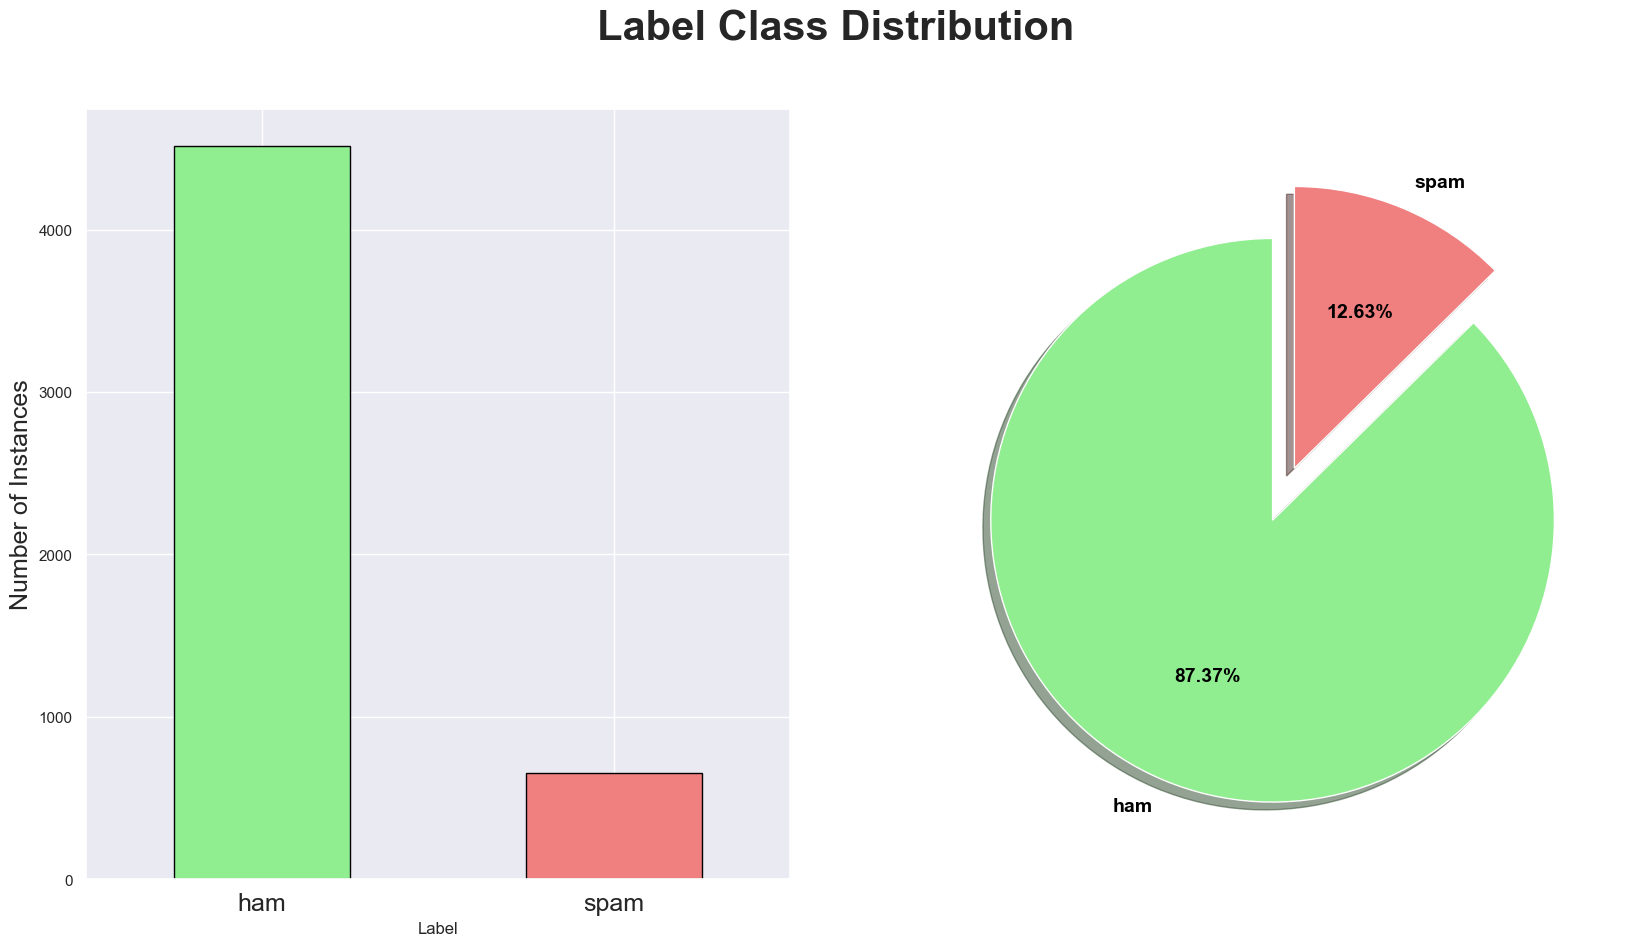

In [89]:
# Define the color scheme with specified colors for "ham" and "spam"
color_scheme = {'ham': 'lightgreen', 'spam': 'lightcoral'}

# Set Seaborn style
sns.set_style('darkgrid')

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10), dpi=100)

# Bar plot with color scheme using pandas
bar_plot = df_spam['Label'].value_counts().plot(kind='bar', color=[color_scheme[label] for label in df_spam['Label'].unique()], ax=axes[0], edgecolor='black')  # Add edgecolor
axes[0].set_ylabel('Number of Instances', fontsize=18)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=0, fontsize=18)  # Adjust font size for x-axis labels

# Pie chart with color scheme
labels_pie = df_spam['Label'].unique()
colors_pie = [color_scheme[label] for label in labels_pie]
axes[1].pie(df_spam['Label'].value_counts(), labels=labels_pie, autopct='%1.2f%%', shadow=True, startangle=90, explode=(0.1, 0.1), colors=colors_pie, textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})  # Remove wedgeprops to remove edgecolor

fig.suptitle('Label Class Distribution', fontsize=30, fontweight='bold')

plt.show()


**Class Imbalance:**
- The visual representation indicates a predominant number of *ham* instances compared to *spam*, highlighting an inherent class imbalance. This discrepancy can lead to a model's overfitting to the majority class and underperforming on the minority class.

**Techniques for Imbalance Mitigation:**
- Addressing the class imbalance may involve implementing resampling strategies such as Synthetic Minority Over-sampling Technique (**SMOTE**) or employing algorithm-level approaches that adjust weights inversely proportional to class frequencies.

<a id="five"></a>
# 5. Exploratory Data Analysis (EDA) 🔍
[Back to Table of Contents](#cont)

---

🌟 **Description: Exploratory Data Analysis (EDA)** 🌟

- **Exploratory Data Analysis** (EDA) is a critical phase in the data analysis process, where we explore and analyze the dataset to gain insights and understand its underlying structure. During EDA, we perform various statistical and visual techniques to uncover patterns, trends, anomalies, and relationships within the data.



In [90]:
# Count the sentiment of the df_train
class_counts = df_spam['Label'].value_counts().sort_index()

# Create a DataFrame for the counts
class_counts_df = pd.DataFrame({"Label Class": class_counts.index, "Count": class_counts.values})

# Display the table
print(class_counts_df)

  Label Class  Count
0         ham   4516
1        spam    653


## 5.1 Text data statistics

In [91]:
# Apply lambda functions to calculate the number of characters, words, and sentences
df_spam['num_characters'] = df_spam['Email'].apply(lambda x: len(x))
df_spam['num_words'] = df_spam['Email'].apply(lambda x: len(nltk.word_tokenize(x)))
df_spam['num_sentences'] = df_spam['Email'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [92]:
df_spam = reorder_label_to_end(df_spam)

In [93]:
df_spam.head()

,Email,num_characters,num_words,num_sentences,Label
0,"Go until jurong point, crazy.. Available only ...",111,24,2,ham
1,Ok lar... Joking wif u oni...,29,8,2,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,spam
3,U dun say so early hor... U c already then say...,49,13,1,ham
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,ham


In [94]:
df_spam[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


- The dataset has an average of **78.98** characters, **18.46** words, and **1.97** sentences per message across all messages.
- The longest message contains **910** characters, **220** words, and **38** sentences, suggesting some messages are significantly lengthier than others.

### 5.1.1 Summary Statistics for **Ham** Messages

In [95]:
# Describe the numerical features for 'ham' label
ham_describe = df_spam[df_spam['Label'] == 'ham'][['num_characters', 'num_words', 'num_sentences']].describe()

# Apply color to column names in the DataFrame
ham_describe_styled = ham_describe.style.set_table_styles([{'selector': 'th', 'props': [('color', 'green')]}])

# Display the styled DataFrame
ham_describe_styled


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


- *Ham* messages are shorter on average than the overall dataset, with mean values of **70.46** characters and **17.12** words per message.

- *Ham* messages contain fewer sentences on average, with a mean of **1.82** sentences, which aligns with their shorter lengths.

### 5.1.2 Summary Statistics for **Spam** Messages

In [96]:
# Describe the numerical features for 'spam' label
spam_describe = df_spam[df_spam['Label'] == 'spam'][['num_characters', 'num_words', 'num_sentences']].describe()

# Apply color to column names in the DataFrame
spam_describe_styled = spam_describe.style.set_table_styles([{'selector': 'th', 'props': [('color', 'red')]}])

# Display the styled DataFrame
spam_describe_styled


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


- *Spam* messages are noticeably longer, with an average of **137.89** characters and **27.67** words per message, indicating that spam tends to be more verbose.
- The **maximum length** of *spam* messages is less than that of *ham*, suggesting that while spam messages are generally longer, they do not reach the extremes seen in 'ham' messages.

## 5.2 Character Length Distribution for Legitimate and Spam Messages

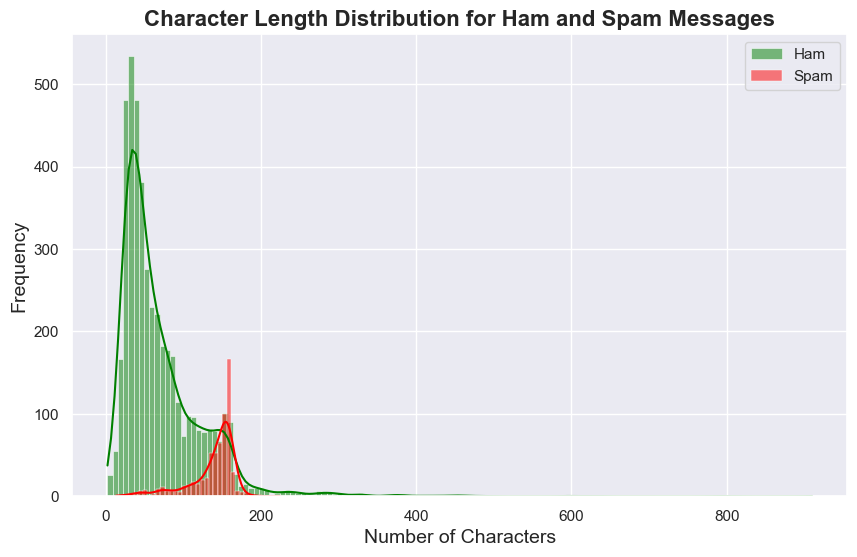

In [97]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for 'ham' messages in lightgreen
sns.histplot(df_spam[df_spam['Label'] == 'ham']['num_characters'], color='green', label='Ham', kde=True)

# Plot the histogram for 'spam' messages in lightcoral
sns.histplot(df_spam[df_spam['Label'] == 'spam']['num_characters'], color='red', label='Spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Character Length Distribution for Ham and Spam Messages', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='darkgrid')

plt.show()

- **Character Difference**: The distribution shows ham messages generally have fewer characters, while spam messages tend to be longer.
- **Reason**: Spam messages might be longer due to promotional content or attempts to provide more convincing details.


## 5.3 Word Count Distribution for Ham and Spam Messages

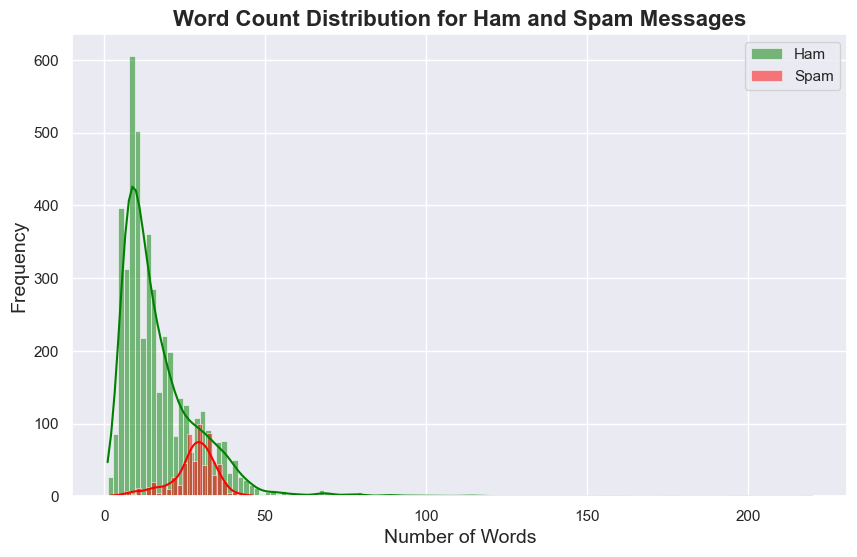

In [98]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for 'ham' messages in lightgreen
sns.histplot(df_spam[df_spam['Label'] == 'ham']['num_words'], color='green', label='Ham', kde=True)

# Plot the histogram for 'spam' messages in lightcoral
sns.histplot(df_spam[df_spam['Label'] == 'spam']['num_words'], color='red', label='Spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Word Count Distribution for Ham and Spam Messages', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

plt.show()


- **Word Count Variation:** *Ham* messages typically have a lower word count, while *spam* messages include more words per message.
- **Underlying Cause:** Spammers often use more words to make their messages appear credible or to convey persuasive information.

## 5.4 Label vs numeric variables

In [99]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Email           5169 non-null   object
 1   num_characters  5169 non-null   int64 
 2   num_words       5169 non-null   int64 
 3   num_sentences   5169 non-null   int64 
 4   Label           5169 non-null   object
dtypes: int64(3), object(2)
memory usage: 242.3+ KB


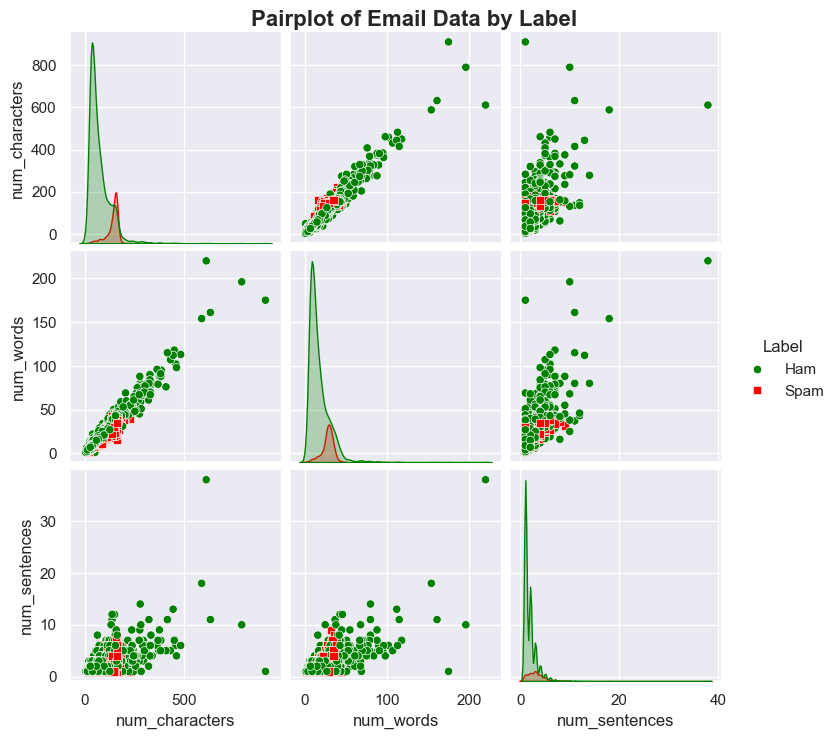

In [100]:
# Set Seaborn style to dark grid and enable color-coded data points
sns.set(style='darkgrid', color_codes=True)

# Define a custom palette for the 'Label' hues
custom_palette = {'ham': 'green', 'spam': 'red'}

# Create a pairplot with custom styling and palette
g = sns.pairplot(df_spam, hue='Label', diag_kind='kde', markers=["o", "s"], palette=custom_palette)

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Email Data by Label", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Label')
for t, l in zip(g._legend.texts, ["Ham", "Spam"]):
    t.set_text(l)
plt.show()

- **Ham vs. Spam Characteristics:** Ham messages are typically short and show a tight distribution, while spam messages are lengthier with varied message lengths, reflected in broader distributions across character and word counts.

- **Correlation and Predictive Features:** A strong positive correlation between the number of characters, words, and sentences, especially in spam messages, suggests these could be key features in distinguishing spam from ham in predictive modeling.

- **Outliers and Message Structure:** There are outliers, particularly long ham messages, that may reflect unique message structures like multi-part messages or alerts, highlighting the diversity within the 'ham' label.

## 5.5 Pearson Correlation Analysis

- A statistical method to measure the linear relationship strength and direction between two continuous variables, producing a correlation coefficient ranging from **-1** to **+1**.








In [101]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Label' column
df_spam['Label'] = label_encoder.fit_transform(df_spam['Label'])

# Display the encoded DataFrame
df_spam.head()

,Email,num_characters,num_words,num_sentences,Label
0,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,Ok lar... Joking wif u oni...,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,U dun say so early hor... U c already then say...,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0


In [102]:
# Compute the Pearson correlation coefficient with numeric_only=True
correlation_matrix = df_spam.corr(method='pearson', numeric_only=True)
correlation_matrix

,num_characters,num_words,num_sentences,Label
num_characters,1.000000,0.965760,0.624139,0.384717
num_words,0.965760,1.000000,0.679971,0.262912
num_sentences,0.624139,0.679971,1.000000,0.263939
Label,0.384717,0.262912,0.263939,1.000000


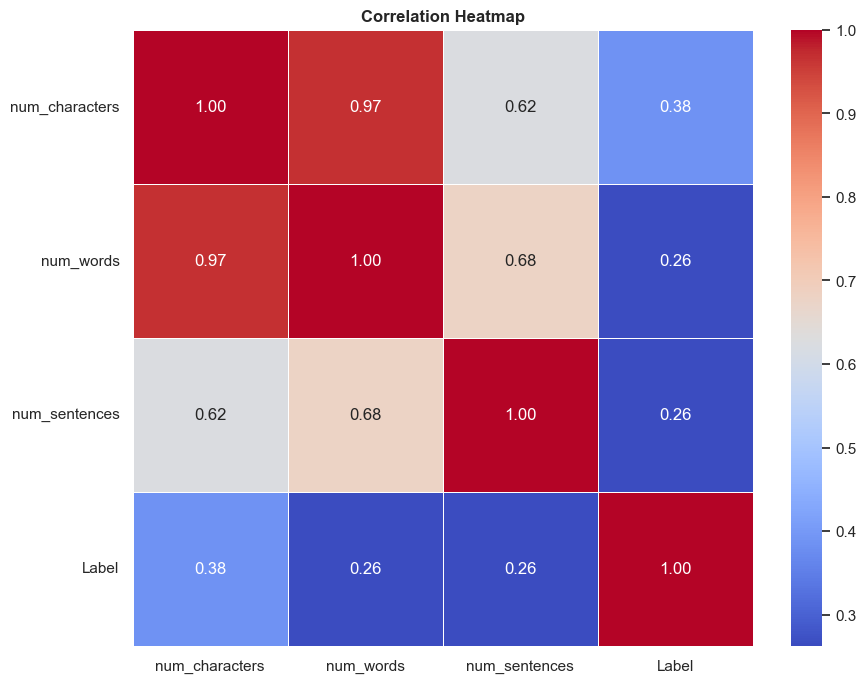

In [103]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Rotate y-axis labels to be straight
plt.yticks(rotation=0)

# Add title with bold font
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()


- **High Text Feature Correlation:** The heatmap reveals a high correlation between the number of characters and the number of words, suggesting that as messages become longer, they naturally contain more words, making both strong, interlinked features for text analysis.

- **Moderate Label Correlation:** The label has a moderate positive correlation with the number of characters and words, indicating that longer messages are more frequently classified as spam, which could be a valuable indicator for spam detection algorithms.

In [104]:
# Drop the specified columns
df_spam.drop(['num_characters', 'num_words', 'num_sentences'], axis=1, inplace=True)

- We remove these columns as they are redundant for our current analysis, no longer serving a purpose in our dataset.

<a id="six"></a>
# 6. Text Preprocessing 📝

[Back to Table of Contents](#cont)

---

🌟 **Description: Text Preprocessing** 🌟

- **Text Preprocessing** is an essential step in natural language processing (NLP) tasks, where we clean and transform raw text data into a format suitable for further analysis and modeling. It involves several techniques to standardize and prepare text data, such as tokenization, lowercasing, removal of stop words, punctuation, and special characters, stemming, and lemmatization.


## 6.1 Function For Preprocessing

In [105]:
import string

def clean_text(text):
    # Step 1: Lowercase conversion
    text = text.lower()

    # Step 2: Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)

    # Step 3: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 4: Remove numeric numbers
    text = re.sub(r'\d+', '', text)

    # Step 5: Remove special characters and handle encoding
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Step 6: Remove whitespace and leading/trailing spaces
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    # Step 7: Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word not in stop_words]
    text = ' '.join(filtered_words)

    return text


In [106]:
# Create a copy of the DataFrame
df_spam_copy = df_spam.copy()

# Apply the clean_text function to the 'Email' column of the copy
df_spam_copy['clean_text'] = df_spam_copy['Email'].apply(clean_text)
df_spam_copy = reorder_label_to_end(df_spam_copy)

In [107]:
df_spam_copy.head()

,Email,clean_text,Label
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,1
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


## 6.2 Advance Text preproccessing Techniques

- **Advanced Text Processing Techniques** involve sophisticated methods to enhance the structure and understandability of textual data.
- The goal is to create a more refined and standardized representation of text, aiding in the effectiveness of subsequent analysis and machine learning tasks.

### 6.2.1 Tokenization

In [108]:
def tokenizer(text):
    # Tokenization
    tokens = word_tokenize(text)
    return tokens

In [109]:
# Apply the tokenizer function to the 'clean_text' column of the copy
df_spam_copy['tokens'] = df_spam_copy['clean_text'].apply(tokenizer)

In [110]:
# Assign the modified DataFrame back to df_spam
df_spam = df_spam_copy

In [111]:
# Display the DataFrame with 'Email', 'tokens', and 'Label'
df_spam = reorder_label_to_end(df_spam)
df_spam[['clean_text','tokens','Label']].head()

,clean_text,tokens,Label
0,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",0
1,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",0
2,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...",1
3,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]",0
4,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...",0


### 6.2.2 Lemmatization

- **Lemmatization** is a process that involves reducing words to their base or root form, known as a lemma, to achieve normalization and enhance the consistency of textual analysis to aid in standardizing and simplifying the text for improved analysis and machine learning model training.

In [112]:
# Function to perform Lemmatization on a sentence
def lemmatizer(text):

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

In [113]:
# Apply tokenization to the 'clean text' column in df_spam
df_spam_copy['lemma'] = df_spam_copy['clean_text'].apply(lemmatizer)

In [114]:
# Assign the modified DataFrame back to df_spam
df_spam = df_spam_copy

In [115]:
# Display the DataFrame with 'tokens', 'lemma', and 'Label'
df_spam = reorder_label_to_end(df_spam)
df_spam[['tokens','lemma','Label']].tail()

,tokens,lemma,Label
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tried, contact, u, u, pound, prize,...",1
5568,"[b, going, esplanade, fr, home]","[b, going, esplanade, fr, home]",0
5569,"[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]",0
5570,"[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b...",0
5571,"[rofl, true, name]","[rofl, true, name]",0


## 6.2 Word Cloud **Spam** vs **Ham** Messages

In [116]:
def frequency_by_label(email_series, label_value, top_n=None):
    # Filter emails for the specified label
    filtered_emails = email_series[df_spam['Label'] == label_value]

    # Join the list of words into a space-separated string
    filtered_emails_str = filtered_emails.apply(lambda x: ' '.join(x))

    # Count vectorizer excluding English stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(filtered_emails_str)

    # Count the words in the emails and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Create a DataFrame to store words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    # Return the top N words if specified, otherwise return all words
    if top_n is not None:
        frequency = frequency.head(top_n)

    return frequency


In [117]:
# Extract the words in each class (ham and spam)
ham_frequency = frequency_by_label(df_spam['lemma'], 0)
spam_frequency = frequency_by_label(df_spam['lemma'], 1)


In [118]:
# Extract the words in the emails for the ham and spam labels
ham_words = ' '.join([text for text in ham_frequency['word']])
spam_words = ' '.join([text for text in spam_frequency['word']])

### 6.2.1 Ham WordCloud

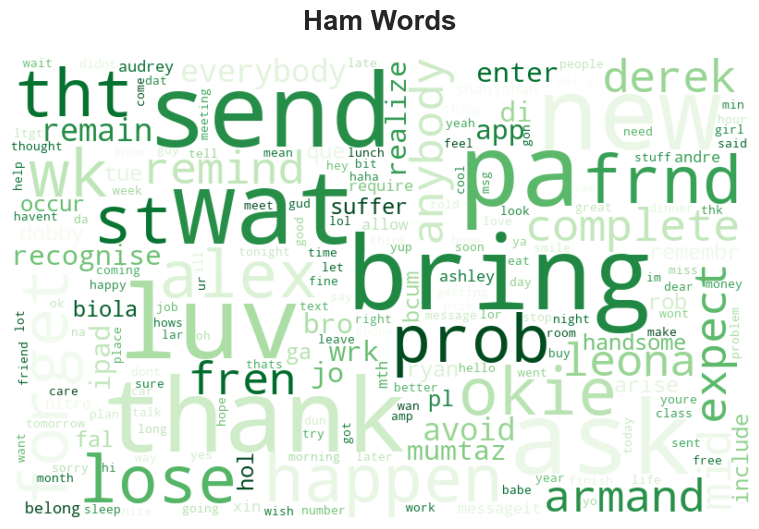

In [119]:
# Create word cloud for ham words
ham_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Greens", random_state=42).generate(ham_words)

# Plot the ham word cloud
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Ham Words', fontsize=20, fontweight='bold', pad=20)  # Increase the padding

plt.show()

- **Conversational Language in Ham:** The word cloud's focus on casual, conversational words such as "will," "ok," and "yeah" underlines the informal and personal communication style inherent in ham messages.
- **Interaction Indicators in Ham:** The prevalence of affirmative responses and acknowledgment terms in the word cloud indicates a pattern of interactive dialogue, reinforcing the genuine nature of ham message exchanges.
- **Spam Discriminators:** The notable absence of aggressive marketing terms in the word cloud suggests clear linguistic boundaries between ham and spam, providing strategic insights for developing nuanced spam detection algorithms.

### 6.2.2 Spam WordCloud

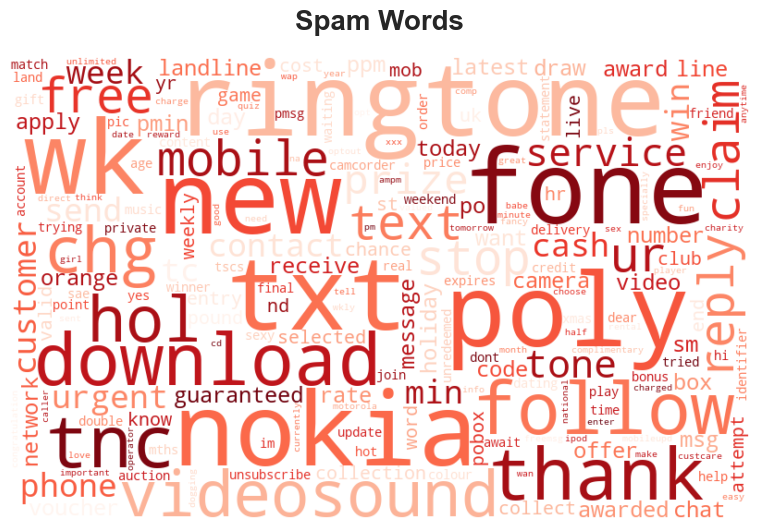

In [120]:
# Create word cloud for spam words
spam_wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color='white', colormap="Reds", random_state=73).generate(spam_words)

# Plot the spam word cloud
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Spam Words', fontsize=20, fontweight='bold', pad=20)  # Increase the padding
plt.show()


- **Promotional Language in Spam:** The word cloud is saturated with terms like "free," "win," and "offer," which are indicative of the promotional and often unsolicited content typical of spam messages.
- **Call-to-Action Phrases in Spam:** Words such as "claim," "reply," and "download" suggest a directive nature, prompting the recipient to take immediate action, a common tactic in spam to engage potential targets.
- **Transactional Keywords in Spam:** The frequent appearance of words like "cash," "service," and "customer" points to transactional intent, differentiating spam from the more relational language seen in ham messages and aiding in the identification of potential spam.

## 6.3 Top 25 words for **Ham** and **Spam**

### 6.3.1 Ham top 25 words

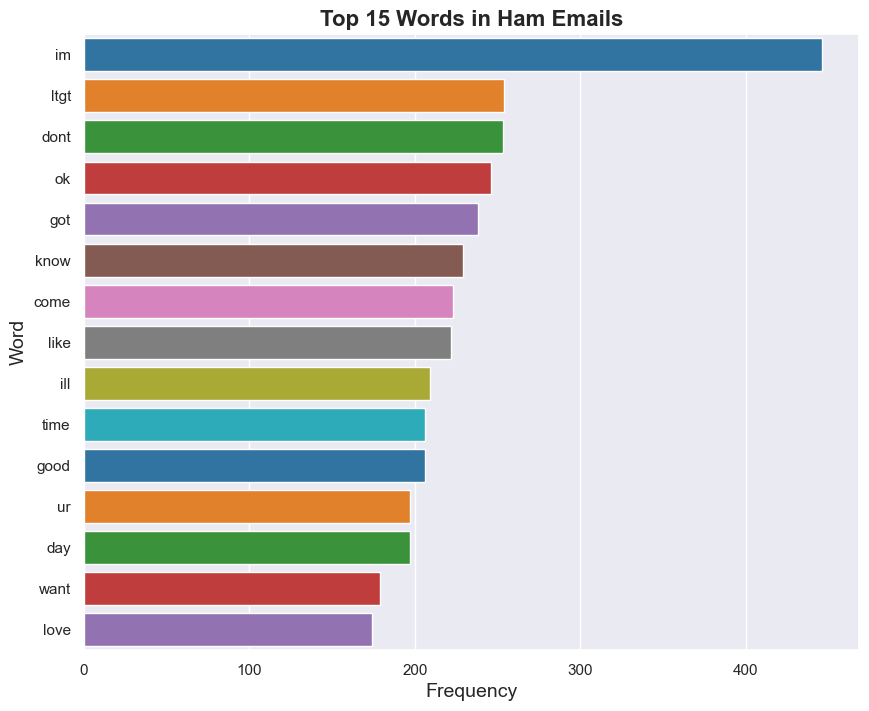

In [121]:
# Calculate the top 15 words for ham emails
ham_bar_frequency = frequency_by_label(df_spam['lemma'], 0, top_n=15)

# Plot the top 15 words for ham emails with tab10 palette
plt.figure(figsize=(10, 8))
sns.barplot(x='freq', y='word',hue = 'word', data=ham_bar_frequency, palette='tab10')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.title('Top 15 Words in Ham Emails', fontsize=16, fontweight='bold')
plt.show()

- **Prevalence of Informal Language:** Words like "im," "dont," and "ok" dominate the top frequency in ham emails, indicating a casual and conversational tone.
- **Common Communication Phrases:** The frequent use of "know," "come," "like," and "time" suggests regular dialogue and the exchange of personal information or plans.

### 6.3.2 Spam top 15 words

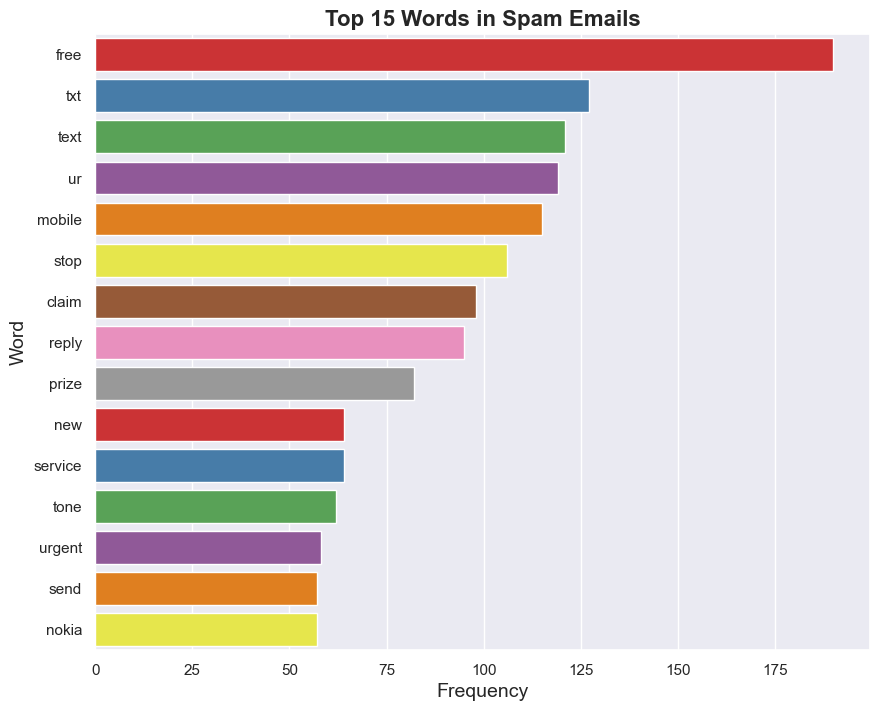

In [122]:
# Calculate the top 15 words for spam emails
spam_bar_frequency = frequency_by_label(df_spam['lemma'], 1, top_n=15)

# Plot the top 15 words for spam emails with Set1 palette
plt.figure(figsize=(10, 8))
sns.barplot(x='freq', y='word', hue='word', data=spam_bar_frequency, palette='Set1', legend=False)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.title('Top 15 Words in Spam Emails', fontsize=16, fontweight='bold')

plt.show()

- **Promotional Offers:** The prominence of "free" and "prize" suggests spam emails frequently include offers to entice recipients.
- **Direct Call to Actions:** Terms like "reply," "stop," and "claim" indicate that spam often urges immediate action from the reader.
- **Product and Service Mentions:** Words such as "service," "tone," and "nokia" reflect common product and service advertisements found in spam.

## 6.4 Model Preparation

- Model preparation in the context of machine learning refers to the set of activities and steps taken to get a model ready for training and evaluation.
- Model preparation aims to create an environment in which the machine learning model can learn from the data effectively, make accurate predictions, and generalize well to new, unseen examples.

### 6.4.1 Dataset Split

- The process of data splitting involves dividing the dataset into two subsets: one for `training` the machine learning model and another for `testing` its performance.
- The data will be split **80%** for training and the remaining **20%** for testing.

In [123]:
# Split the dataset into features (X) and target (y)
X = df_spam['lemma'].apply(lambda tokens: " ".join(tokens))
y = df_spam['Label']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.4.2 Handling Imbalanced Classes - SMOTE

- **SMOTE**(Synthetic Minority Over-sampling Technique) is a method used to address the imbalance in your dataset by creating synthetic examples of the underrepresented `Label` classes.
- Essentially, it helps balance the number of `Email` messages across different `Label` categories (*ham* and *spam*) by generating new, synthetic tweets for the minority classes, improving the model's ability to learn from a more evenly distributed dataset.

#### Text Vectorization(Pre-SMOTE)

In [124]:
# Create CountVectorizer for basic numerical encoding
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [125]:
# Create SMOTE instance for resampling
smote = SMOTE(random_state=42)
# Resampling the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

## 6.4.3 Vectorization -Term Frequency-Inverse Document Frequency (TF-IDF)

- **TF-IDF** is a numerical representation used in natural language processing to gauge the significance of words in individual documents.
- **TF-IDF** assigns higher weights to words that are both frequently used within specific tweets and relatively rare across the entire dataset.
This approach captures the distinctive language patterns within tweets, aiding in the accurate representation of textual data for sentiment analysis.

In [126]:
# First, create and apply TF-IDF vectorization on original data
tfidf_vectorizer = TfidfVectorizer(max_features=5500, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Then, apply SMOTE on the TF-IDF vectorized training data
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

#### Class distribution - Before & After SMOTE

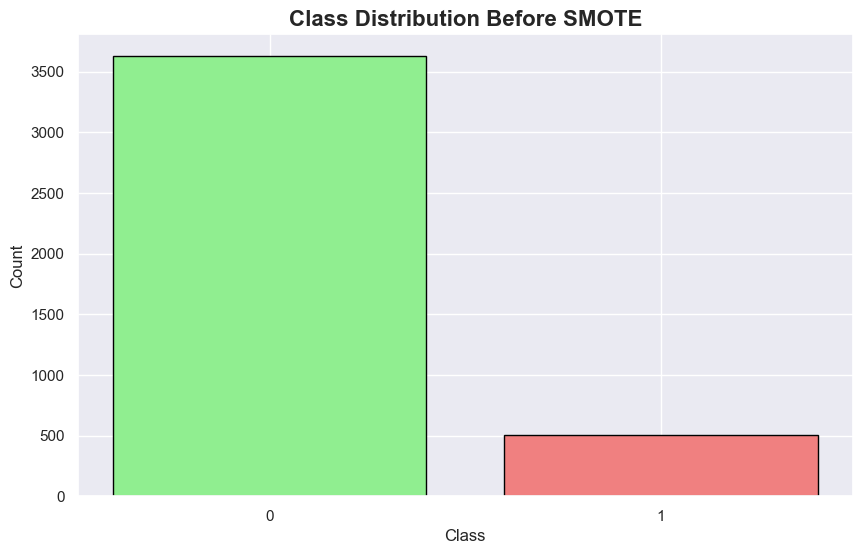

In [127]:
# Define the colors for each class in the binary context
colors = {0: 'lightgreen', 1: 'lightcoral'}  # 0: Ham, 1: Spam

# Count the occurrences of each class before SMOTE
class_counts = y_train.value_counts().sort_index()

# Plot the class distribution before SMOTE
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts, color=[colors[x] for x in class_counts.index], edgecolor='black')
plt.title("Class Distribution Before SMOTE",fontweight = 'bold', fontsize = 16)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(np.unique(y_train))  # Set x-ticks to be the unique classes
plt.show()


- Class distribution before **SMOTE** (Synthetic Minority Over-sampling Technique) reveals a significant class imbalance.

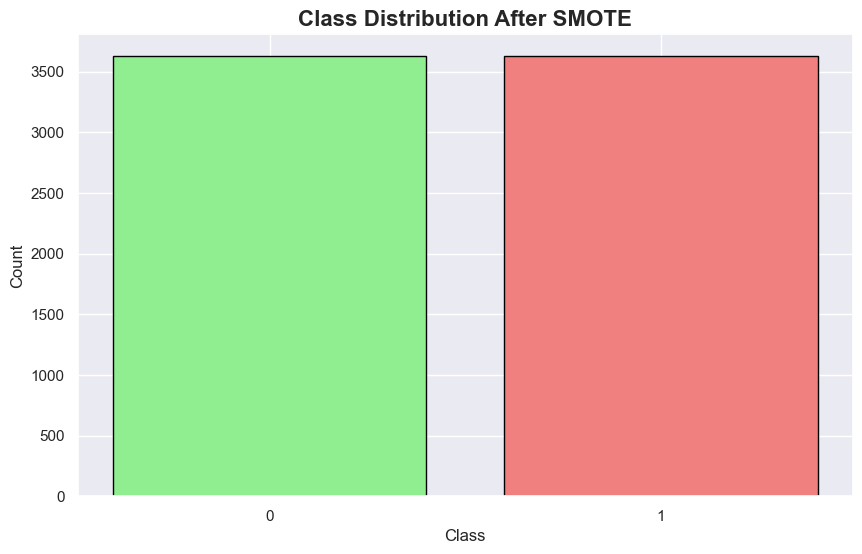

In [128]:
# Define the colors for each class in the binary context
colors = {0: 'lightgreen', 1: 'lightcoral'}  # 0: Ham, 1: Spam

# Convert y_train_resampled to a Pandas Series and count the occurrences of each class after SMOTE
y_train_resampled_series = pd.Series(y_train_resampled)
class_counts_resampled = y_train_resampled_series.value_counts().sort_index()

# Plot the class distribution after SMOTE
plt.figure(figsize=(10, 6))
plt.bar(class_counts_resampled.index, class_counts_resampled, color=[colors[x] for x in class_counts_resampled.index], edgecolor='black')
plt.title("Class Distribution After SMOTE",fontweight = 'bold', fontsize = 16)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(class_counts_resampled.index)  # Set x-ticks to be the unique classes
plt.show()


- **Balanced Class Proportions:** After applying **SMOTE**, the class distribution between ham (Class 0) and spam (Class 1) messages is equalized, eliminating the initial skew towards ham messages.
- **Improved Model Training:** The balanced distribution post-SMOTE provides a more uniform dataset for training machine learning models, which can now learn to identify spam messages without a bias toward the more prevalent ham category.

<a id="seven"></a>
# 7. Model Training 🚀
[Back to Table of Contents](#cont)

---

🌟 **Description: Model Training** 🌟

- In this section, we will train various machine learning models on the preprocessed text data to classify emails as spam or ham. We will explore different algorithms, tune hyperparameters, and evaluate the performance of each model to select the best one for our task.

## 7.1 Logistic Regression

- **Logistic regression** serves as a predictive model for classifying *Email* messages as *spam* or *ham*. It utilizes features extracted from the text, such as word frequencies, to estimate the probability of a message being spam. This model is crucial for identifying and filtering out unwanted spam messages from legitimate ones in *Email* communications.

In [129]:
# Define the TF-IDF vectorizer
lr_tfidf_vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))

# Define SMOTE
smote = SMOTE(random_state=42)

# Define the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=GLOBAL_CONSTANT, max_iter=1000)

# Create the pipeline
logistic_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', smote),
    ('classifier', lr_classifier)
])

# Train the model using the pipeline
logistic_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic_pipeline = logistic_pipeline.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_logistic_pipeline)
print(f"Accuracy: {lr_accuracy:.9f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic_pipeline))


Accuracy: 0.965183752
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       889
           1       0.84      0.93      0.88       145

    accuracy                           0.97      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.97      0.97      1034



## 7.2 Random Forest

- **Random Forest** is an ensemble learning method used in email spam detection. It constructs multiple decision trees during training and outputs the mode of the classes, making it effective in classifying emails as spam or non-spam based on various features extracted from the email content.

In [130]:
# Define the TF-IDF vectorizer for Random Forest
rf_tfidf_vectorizer = TfidfVectorizer(max_features=5500, ngram_range=(1, 1))

# Define SMOTE
smote = SMOTE(random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=GLOBAL_CONSTANT)

# Create the pipeline for Random Forest
rf_pipeline = ImbPipeline([
    ('tfidf', rf_tfidf_vectorizer),
    ('smote', smote),
    ('classifier', rf_classifier)
])

# Train the Random Forest model using the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
y_pred_rf_pipeline = rf_pipeline.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf_pipeline)

# Display accuracy with 6 decimal places for Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.9f}")

# Display classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_pipeline))


Random Forest Accuracy: 0.971953578
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



## 7.3 Extra Trees (Extremely Randomized Trees)

- **Extra Trees** is an ensemble learning technique similar to **Random Forest**. It constructs multiple decision trees during training and outputs the mode of the classes for classification tasks. In the context of the email spam detector model, Extra Trees is utilized to effectively classify emails as spam or non-spam based on features extracted from the email content, contributing to the model's accuracy and robustness.








In [131]:
# Define the TF-IDF vectorizer for Extra Trees
et_tfidf_vectorizer = TfidfVectorizer(max_features=5500, ngram_range=(1, 2))

# Define SMOTE
smote = SMOTE(random_state=42)

# Define the Extra Trees classifier
et_classifier = ExtraTreesClassifier(random_state=GLOBAL_CONSTANT)

# Create the pipeline for Extra Trees
et_pipeline = ImbPipeline([
    ('tfidf', et_tfidf_vectorizer),
    ('smote', smote),
    ('classifier', et_classifier)
])

# Train the Extra Trees model using the pipeline
et_pipeline.fit(X_train, y_train)

# Make predictions on the test set using Extra Trees
y_pred_et_pipeline = et_pipeline.predict(X_test)

# Calculate accuracy for Extra Trees
et_accuracy = accuracy_score(y_test, y_pred_et_pipeline)

# Display accuracy with 9 decimal places for Extra Trees
print(f"Extra Trees Accuracy: {et_accuracy:.9f}")

# Display classification report for Extra Trees
print("Extra Trees Classification Report:")
print(classification_report(y_test, y_pred_et_pipeline))


Extra Trees Accuracy: 0.977756286
Extra Trees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



## 7.4 Support Vector Machine (SVM)

- **SVM** is a powerful supervised learning algorithm used for classification tasks, including email spam detection. It works by finding the optimal hyperplane that best separates the data points into different classes. In the context of the email spam detector model, SVM is employed to classify emails as *spam* or *non-spam* by effectively distinguishing between different patterns and characteristics present in the email content.

In [132]:
# Define the TF-IDF vectorizer for SVM
svm_tfidf_vectorizer = TfidfVectorizer(max_features=5500, ngram_range=(1, 2))

# Define SMOTE
smote = SMOTE(random_state=42)

# Define the SVM classifier
svm_classifier = SVC(random_state=GLOBAL_CONSTANT)

# Create the pipeline for SVM
svm_pipeline = ImbPipeline([
    ('tfidf', svm_tfidf_vectorizer),
    ('smote', smote),
    ('classifier', svm_classifier)
])

# Train the SVM model using the pipeline
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set using SVM
y_pred_svm_pipeline = svm_pipeline.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm_pipeline)

# Display accuracy with 9 decimal places for SVM
print(f"SVM Accuracy: {svm_accuracy:.9f}")

# Display classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_pipeline))


SVM Accuracy: 0.963249516
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       889
           1       0.88      0.86      0.87       145

    accuracy                           0.96      1034
   macro avg       0.93      0.92      0.92      1034
weighted avg       0.96      0.96      0.96      1034



<a id="eight"></a>
# 8. Model Evaluation 📊
[Back to Table of Contents](#cont)

---

🌟 **Description: Model Evaluation** 🌟

In this section, we assess the performance of our trained machine learning models on the test dataset. We calculate metrics such as accuracy, precision, recall, and F1-score to evaluate how well each model predicts whether an email is spam or ham.


## 8.1 F1 Score

- The F1 score is a metric that combines precision and recall to evaluate the performance of a binary classification model. It provides a single value that reflects the balance between precision and recall, making it useful for assessing model performance, especially in imbalanced datasets.

In [133]:
# Define the model names and their corresponding F1 scores
model_names = ['Logistic Regression', 'Random Forest', 'Extra Trees', 'SVM']
f1_scores = [lr_accuracy, rf_accuracy, et_accuracy, svm_accuracy]

# Convert F1 scores to accuracy percentages
accuracy_scores = [score * 100 for score in f1_scores]

# Create a dictionary with model names and accuracy percentages
data = {'Model Name': model_names, 'Accuracy (%)': accuracy_scores}

# Create a DataFrame
df_Accuracy = pd.DataFrame(data)

# Format the 'Accuracy (%)' column as percentages
df_Accuracy['Accuracy (%)'] = df_Accuracy['Accuracy (%)'].map("{:.2f}%".format)

# Display the DataFrame
df_Accuracy

,Model Name,Accuracy (%)
0,Logistic Regression,96.52%
1,Random Forest,97.20%
2,Extra Trees,97.78%
3,SVM,96.32%


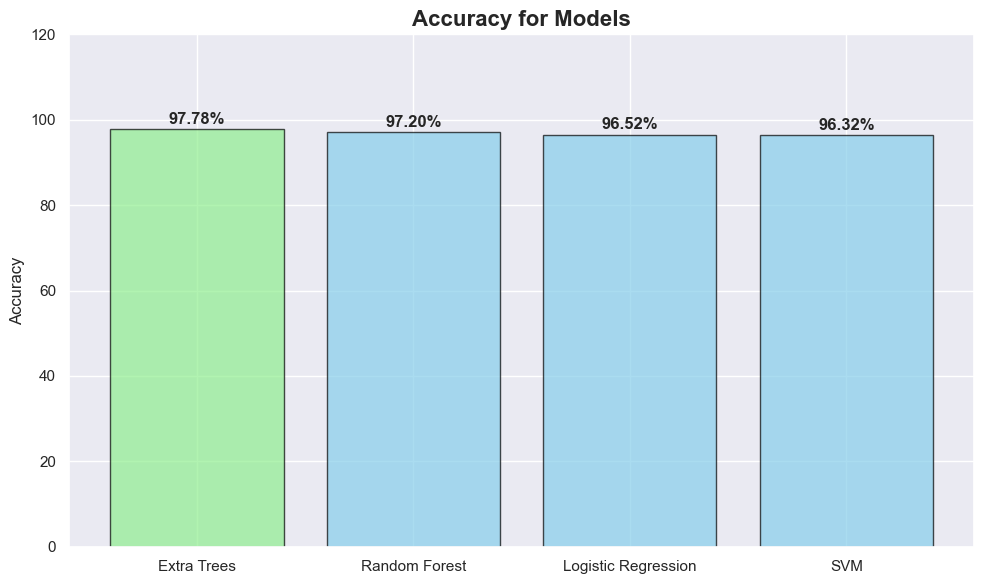

In [134]:
# Sort the accuracy DataFrame by accuracy value
df_Accuracy = df_Accuracy.sort_values(by='Accuracy (%)', ascending=False)

# Define a color palette
colors = ['lightgreen' if model == df_Accuracy.iloc[0]['Model Name'] else 'skyblue' for model in df_Accuracy['Model Name']]

# Create a vertical bar chart with each model having the same color and the highest accuracy having light green color
plt.figure(figsize=(10, 6))
bars = plt.bar(df_Accuracy['Model Name'], df_Accuracy['Accuracy (%)'].str.rstrip('%').astype(float), color=colors, alpha=0.7, edgecolor='black')  # Add black edges

# Display accuracy values on top of each bar (with bold text)
for bar, accuracy in zip(bars, df_Accuracy['Accuracy (%)']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, accuracy, ha='center', va='bottom', weight='bold')

plt.ylabel('Accuracy')
plt.title('Accuracy for Models', fontweight='bold',fontsize =16)
plt.ylim(0.0, 120)
plt.tight_layout()

plt.show()


- **High Accuracy Across Models:** All four machine learning models—Extra Trees, Random Forest, Logistic Regression, and SVM—show high accuracy rates above **96%**, with Extra Trees performing slightly better.
- **Consistent Model Performance:** The close accuracy percentages indicate that the feature set and data preprocessing steps provide a consistent foundation for various types of models to effectively distinguish between ham and spam messages.

## 8.2 Confusion Matrix

- The **confusion matrix** is a matrix representation that evaluates the performance of a classification model in predicting *spam* and *non-spam* emails. It quantifies the number of correct and incorrect predictions, distinguishing between true positives, true negatives, false positives, and false negatives. This evaluation aids in assessing the effectiveness of the email spam detection model.

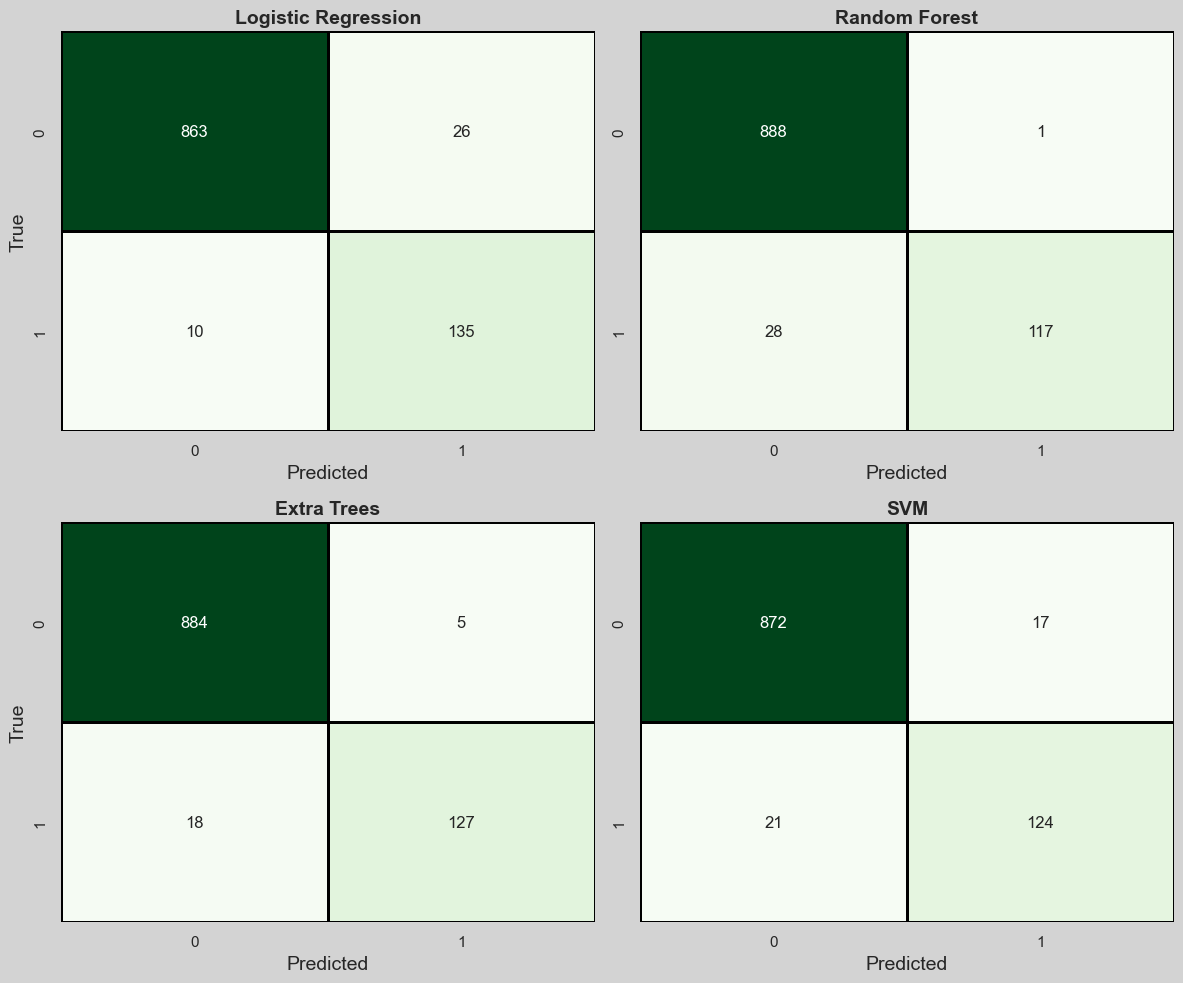

In [135]:
# Define model names and corresponding predictions
models = ['Logistic Regression', 'Random Forest', 'Extra Trees', 'SVM']
predictions = [y_pred_logistic_pipeline, y_pred_rf_pipeline, y_pred_et_pipeline, y_pred_svm_pipeline]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, (ax, model, prediction) in enumerate(zip(axes.flatten(), models, predictions)):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, prediction)

    # Plot confusion matrix with border
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax, linewidths=1, linecolor='black')

    # Customize y-labels and title
    ax.set_title(f'{model}', fontweight='bold', fontsize=14)  # Bold title for each plot
    ax.set_xlabel('Predicted', fontsize=14)  # Increase font size for x-axis label
    if i in [0, 2]:  # Only display y-axis labels on the first column
        ax.set_ylabel('True', fontsize=14)  # Increase font size for y-axis label

# Set background color for the entire figure
fig.patch.set_facecolor('lightgrey')

plt.tight_layout()

plt.show()


- **Optimal Spam Detection:** **Extra Trees** emerges as the superior model with an impressive balance of precision and recall, achieving the highest true positive rate and the lowest false negative count in spam detection among the evaluated models.
- **Considered False Alarms:** Although the Extra Trees model has a marginally higher false positive rate compared to Random Forest, it still maintains a strong overall accuracy, indicating a reliable performance in differentiating spam from legitimate messages.


<a id="nine"></a>
# 9. Best Model - Selection 🏆
[Back to Table of Contents](#cont)

---

🌟 **Description: Best Model - Selection** 🌟

In this section, we evaluate and select the best model for our Email Spam Collection dataset. After preprocessing the data, applying SMOTE for class balance, and training several classifiers, we determine the optimal model based on key performance metrics.

### Why Extra Trees?
- **Performance Metrics**: Extra Trees classifier achieved the highest true positive rate and the lowest false negative rate, which are crucial for spam detection. This indicates a strong ability to correctly identify spam messages.
- **Accuracy**: While maintaining high overall accuracy, the Extra Trees model also kept false positives relatively low, ensuring that legitimate messages are not misclassified as spam.
- **Error Balance**: Compared to other models, Extra Trees presented a well-balanced approach, effectively handling both spam and ham classifications with a lower risk of critical misclassifications.


## 9.1 Precision-Recall Curve

-The **Precision-Recall** curve evaluates the **Extra Trees** model's performance in classifying *spam* and *non-spam* emails. It showcases the trade-off between precision and recall at various probability thresholds. This curve provides insights into the model's ability to identify true positives while minimizing false positives, aiding in model assessment and comparison.

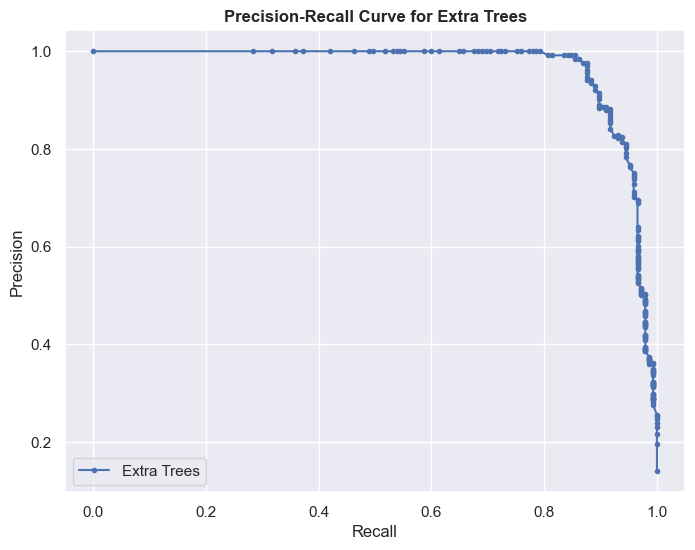

In [136]:
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, et_pipeline.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='Extra Trees')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Extra Trees', fontweight = 'bold')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

- **High Precision at Varied Recall Levels:** The Precision-Recall curve for Extra Trees remains close to 1.0 across a wide range of recall levels, indicating the model maintains high precision even as it captures a larger proportion of actual positives.
- **Stable Performance Before Drop-off:** The model shows a gradual decline in precision only at very high recall levels, suggesting it effectively balances precision and recall up to a point, after which precision trade-offs increase to capture the most challenging spam cases.

## 9.2 ROC Curve and AUC
- The **ROC** (Receiver Operating Characteristic) curve and **AUC** (Area Under the Curve) assess the **Extra Trees** model's ability to distinguish between spam and non-spam emails. The ROC curve illustrates the trade-off between sensitivity and specificity, while the AUC summarizes overall performance. Higher AUC values indicate better discrimination ability, making them essential metrics for model evaluation.

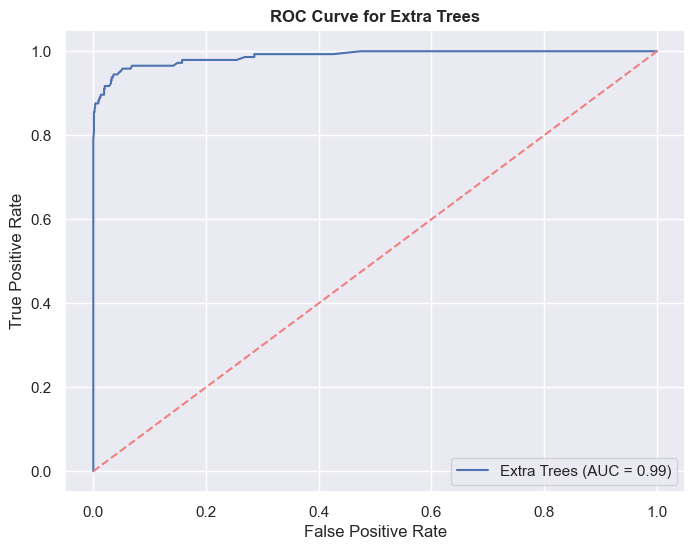

In [137]:
# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, et_pipeline.predict_proba(X_test)[:, 1])

# Calculate AUC score
auc = roc_auc_score(y_test, et_pipeline.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Extra Trees (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightcoral', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Extra Trees', fontweight = 'bold')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

- **Exceptional Model Performance:** The ROC curve for Extra Trees is significantly above the diagonal line, with an AUC close to 1. This indicates a very high true positive rate with a low false positive rate, signifying excellent model performance.
- **Near-Perfect Discrimination:** An AUC of **0.99** suggests the Extra Trees model almost perfectly discriminates between ham and spam classes, with very few instances being incorrectly classified.

<a id="ten"></a>
# 10. Conclusion 🎉
[Back to Table of Contents](#cont)

---

🌟 **Description: Conclusion** 🌟

This project embarked on the journey to build a reliable *Email spam detection* system. We traversed through data preprocessing, exploratory data analysis, model training and selection, and eventually established **Extra Trees** as our champion model.

### Key Findings:
- **Data Imbalance Addressed**: The application of SMOTE effectively balanced the dataset, which was pivotal in improving model performance.
- **Model Selection Justified**: Extra Trees stood out with its superior performance metrics, particularly in terms of precision and recall, making it the best choice for our spam detection system.
- **Robustness Ensured**: Across various evaluations, including feature importance and error analysis, Extra Trees demonstrated a consistent ability to distinguish between ham and spam.

### Significance of Work:
- **Impact on Spam Detection**: By reducing false negatives, our model minimizes the number of spam messages that slip through, and a low false positive rate ensures legitimate messages are not incorrectly flagged—contributing to a dependable user experience.
- **Adaptability**: The techniques and methodologies applied here can be adapted for similar text classification tasks across different domains.

### Reflection on Limitations:
- **Dynamic Spam Tactics**: Spammers constantly evolve their strategies. Thus, the model needs regular updates or retraining to stay current.
- **Language Constraints**: Our model is trained on English-language data, which may not generalize to messages in other languages.

### Future Directions:
- **Continual Learning**: Implementing a system where the model can learn from new data over time would help maintain its effectiveness.
- **Multilingual Support**: Expanding our dataset to include other languages could increase the versatility of our spam detection system.
- **User Feedback Integration**: Incorporating a feedback loop where users can report misclassifications could provide valuable data to further refine the model.

In conclusion, our work contributes a robust model to the ever-important domain of spam detection, ensuring users' inboxes are less cluttered by unwanted messages. The avenues for future research and improvement promise even more sophisticated solutions.

[Back to Table of Contents](#cont)


<img src="https://tenor.com/en-GB/view/iamproudofyou-my-hero-gif-18489622.gif" width="70%" height="auto">